In [161]:
# import libraries

import numpy as np 

import pandas as pd

import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

import warnings 
warnings.filterwarnings(action="ignore")


In [162]:
df=pd.read_csv(r"C:\Users\Jaspreet Singh\Downloads\mall_feedback.csv")

In [163]:
df[:2]

Name  Gender  Age                  Email  \
0  Karan2497    Male   22  karan2497@example.com   
1   Amit9437  Female   41   amit9437@example.com   

                               Feedback Sentiment  Rating  
0  Product quality is not satisfactory.  Negative       2  
1       The staff was not very helpful.  Negative       1

In [164]:
df.shape

(10000, 7)

In [165]:
df.isnull().sum()

Name         0
Gender       0
Age          0
Email        0
Feedback     0
Sentiment    0
Rating       0
dtype: int64

In [166]:
df.dtypes

Name         object
Gender       object
Age           int64
Email        object
Feedback     object
Sentiment    object
Rating        int64
dtype: object

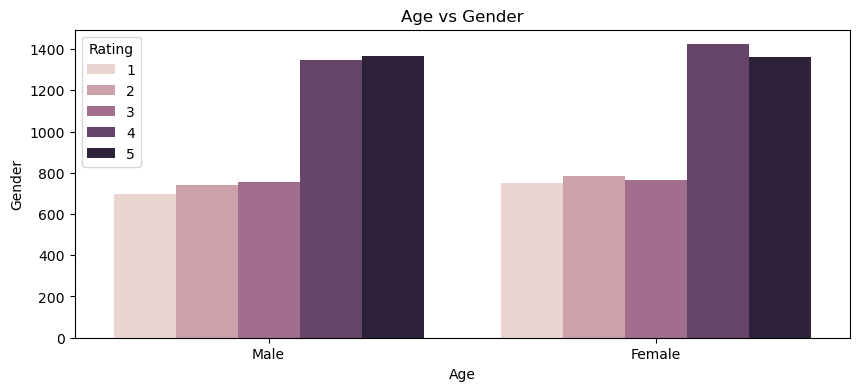

In [167]:
plt.figure(figsize=(10,4))
sns.countplot(data=df,x=df.Gender,hue=df.Rating)
plt.title("Age vs Gender")
plt.xlabel("Age")
plt.ylabel("Gender")
plt.show()

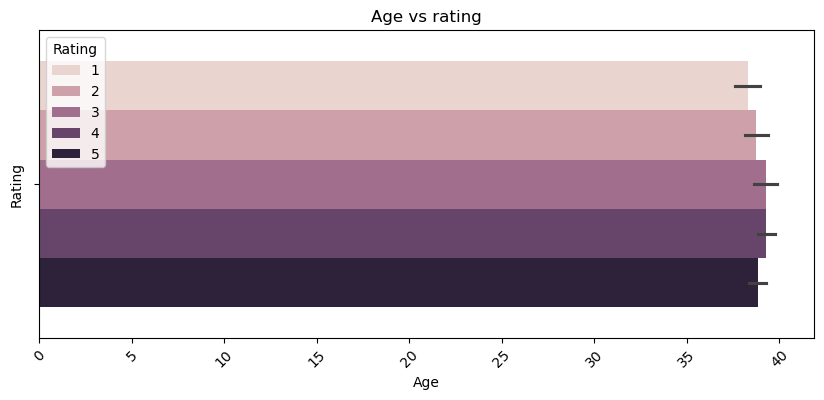

In [168]:
plt.figure(figsize=(10,4))
sns.barplot(data=df,x=df.Age,hue=df.Rating)
plt.title("Age vs rating")
plt.xlabel("Age")
plt.xticks(rotation=45)
plt.ylabel("Rating")
plt.show()

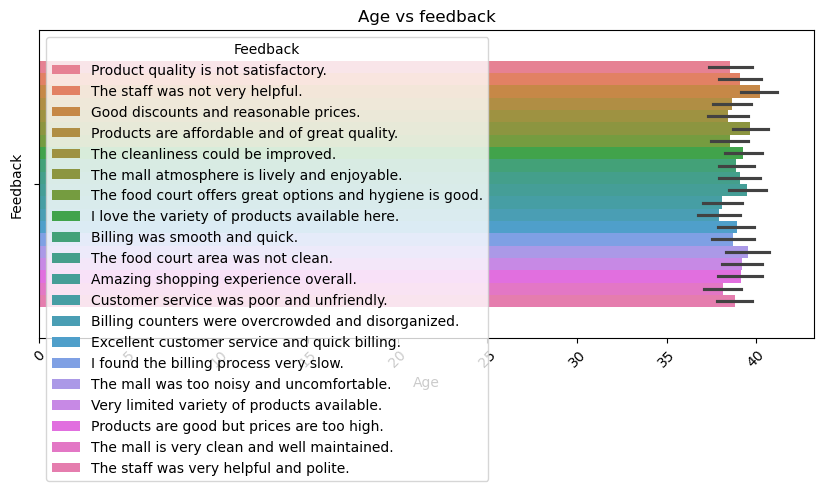

In [169]:
plt.figure(figsize=(10,4))
sns.barplot(data=df,x=df.Age,hue=df.Feedback)
plt.title("Age vs feedback")
plt.xlabel("Age")
plt.xticks(rotation=45)
plt.ylabel("Feedback")
plt.show()

In [170]:
from sklearn.preprocessing import LabelEncoder

In [171]:
le=LabelEncoder()

In [172]:
df["Gender"]=le.fit_transform(df["Gender"])

In [173]:
df.Gender

0       1
1       0
2       1
3       0
4       0
       ..
9995    1
9996    1
9997    0
9998    0
9999    0
Name: Gender, Length: 10000, dtype: int32

In [174]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [175]:
vectorizer=TfidfVectorizer(max_features=100)

In [176]:
df[:2]

Name  Gender  Age                  Email  \
0  Karan2497       1   22  karan2497@example.com   
1   Amit9437       0   41   amit9437@example.com   

                               Feedback Sentiment  Rating  
0  Product quality is not satisfactory.  Negative       2  
1       The staff was not very helpful.  Negative       1

In [177]:
x=vectorizer.fit_transform(df["Feedback"])

In [178]:
x[:2]

<2x67 sparse matrix of type '<class 'numpy.float64'>'
	with 11 stored elements in Compressed Sparse Row format>

In [179]:
x=vectorizer.fit_transform(df["Feedback"]).toarray()

In [180]:
x

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.33246134, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.17690453, ..., 0.        , 0.        ,
        0.46874513],
       [0.        , 0.        , 0.21542192, ..., 0.        , 0.        ,
        0.        ]])

In [181]:
y=df.Rating

In [182]:
x[:2]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.32739562, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.38126242, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.53125377, 0.        , 0.42777323,
        0.        , 0.        , 0.53125377, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.     

In [183]:
y[:3]

0    2
1    1
2    3
Name: Rating, dtype: int64

In [184]:
from sklearn.model_selection import train_test_split

In [185]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=123)

In [186]:
len(x_train),len(x_test)

(8000, 2000)

In [187]:
from sklearn.tree import DecisionTreeRegressor

In [188]:
tree=DecisionTreeRegressor()

In [189]:
r=tree.fit(x_train,y_train)

In [191]:
y_pred=r.predict(x_test)

In [192]:
y_pred

array([4.49656751, 4.53433476, 4.49047619, ..., 2.07631579, 4.50505051,
       4.50361446])

In [196]:
tree.score(x_test,y_test)

0.7680240449375448

In [ ]:
from sklearn.metrics import r2_score

In [197]:
r2_score(y_test,y_pred)

0.7680240449375448

In [199]:
import joblib 

In [200]:
joblib.dump(tree,"tree.pkl")
joblib.dump(vectorizer,"vectorzier.pkl")

['vectorzier.pkl']